In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import ensemble
from sklearn.inspection import permutation_importance
import seaborn as sns
pd.pandas.set_option('display.max_columns', None)

In [2]:
# load the train set
X_train = pd.read_csv('xtrain.csv')
X_test = pd.read_csv('xtest.csv')
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
0,0.750000,0.75,0.461171,0.0,1.0,1.0,0.333333,1.000000,1.0,0.0,0.0,0.863636,0.4,1.0,0.75,0.6,0.777778,0.50,0.014706,0.049180,0.0,0.0,1.0,1.0,0.333333,0.00000,0.666667,0.5,1.0,0.666667,0.666667,0.666667,1.0,0.002835,0.0,0.0,0.673479,0.239935,1.0,1.00,1.0,1.0,0.559760,0.0,0.0,0.523250,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.000000,0.0,0.75,0.018692,1.0,0.75,0.430183,0.5,0.5,1.0,0.116686,0.032907,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.545455,0.666667,0.75,0.0,0.0,0.0
1,0.750000,0.75,0.456066,0.0,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.363636,0.4,1.0,0.75,0.6,0.444444,0.75,0.360294,0.049180,0.0,0.0,0.6,0.6,0.666667,0.03375,0.666667,0.5,0.5,0.333333,0.666667,0.000000,0.8,0.142807,0.0,0.0,0.114724,0.172340,1.0,1.00,1.0,1.0,0.434539,0.0,0.0,0.406196,0.333333,0.0,0.333333,0.5,0.375,0.333333,0.666667,0.250000,1.0,0.000000,0.0,0.75,0.457944,0.5,0.25,0.220028,0.5,0.5,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.75,1.0,0.0,0.636364,0.666667,0.75,0.0,0.0,0.0
2,0.916667,0.75,0.394699,0.0,1.0,1.0,0.000000,0.333333,1.0,0.0,0.0,0.954545,0.4,1.0,1.00,0.6,0.888889,0.50,0.036765,0.098361,1.0,0.0,0.3,0.2,0.666667,0.25750,1.000000,0.5,1.0,1.000000,0.666667,0.000000,1.0,0.080794,0.0,0.0,0.601951,0.286743,1.0,1.00,1.0,1.0,0.627205,0.0,0.0,0.586296,0.333333,0.0,0.666667,0.0,0.250,0.333333,1.000000,0.333333,1.0,0.333333,0.8,0.75,0.046729,0.5,0.50,0.406206,0.5,0.5,1.0,0.228705,0.149909,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.090909,0.666667,0.75,0.0,0.0,0.0
3,0.750000,0.75,0.445002,0.0,1.0,1.0,0.666667,0.666667,1.0,0.0,0.0,0.454545,0.4,1.0,0.75,0.6,0.666667,0.50,0.066176,0.163934,0.0,0.0,1.0,1.0,0.333333,0.00000,0.666667,0.5,1.0,0.666667,0.666667,1.000000,1.0,0.255670,0.0,0.0,0.018114,0.242553,1.0,1.00,1.0,1.0,0.566920,0.0,0.0,0.529943,0.333333,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.250000,1.0,0.333333,0.4,0.75,0.084112,0.5,0.50,0.362482,0.5,0.5,1.0,0.469078,0.045704,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.636364,0.666667,0.75,1.0,0.0,0.0
4,0.750000,0.75,0.577658,0.0,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.363636,0.4,1.0,0.75,0.6,0.555556,0.50,0.323529,0.737705,0.0,0.0,0.6,0.7,0.666667,0.17000,0.333333,0.5,0.5,0.333333,0.666667,0.000000,0.6,0.086818,0.0,0.0,0.434278,0.233224,1.0,0.75,1.0,1.0,0.549026,0.0,0.0,0.513216,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.333333,0.416667,1.0,0.333333,0.8,0.75,0.411215,0.5,0.50,0.406206,0.5,0.5,1.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.00,1.0,0.0,0.545455,0.666667,0.75,0.0,0.0,0.0


In [3]:
# load the target (log transformed)
y_train = pd.read_csv('ytrain.csv')
y_test = pd.read_csv('ytest.csv')
y_train.head()

,SalePrice
0,12.211060
1,11.887931
2,12.675764
3,12.278393
4,12.103486


## 0. Feature Selection

In [4]:
# use the selectFromModel object from sklearn
sel_ = SelectFromModel(Lasso(alpha=0.001, random_state=0))

# train Lasso model and select features
sel_.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.001, random_state=0))

In [5]:
sel_.get_support().sum()

36

In [6]:
# visualise those selected features ("True")
sel_.get_support()

array([ True,  True,  True, False, False, False,  True,  True, False,
        True, False,  True, False, False, False, False,  True,  True,
       False,  True,  True, False,  True, False, False, False,  True,
       False,  True,  True, False,  True,  True, False, False, False,
       False, False, False,  True,  True, False,  True,  True, False,
        True,  True, False, False,  True, False, False,  True,  True,
        True,  True,  True, False, False,  True,  True,  True, False,
       False,  True,  True, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False])

In [7]:
# the list of the selected features
selected_feats = X_train.columns[(sel_.get_support())]

# stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feats)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 81
selected features: 36
features with coefficients shrank to zero: 45


In [8]:
selected_feats

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotShape', 'LandContour',
       'LotConfig', 'Neighborhood', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'CentralAir',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'HalfBath',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageFinish', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'ScreenPorch', 'SaleCondition'],
      dtype='object')

In [9]:
pd.Series(selected_feats).to_csv('selected_features.csv', index=False)
features = pd.read_csv('selected_features.csv')
features = features['0'].to_list() 

In [10]:
features = selected_feats
features = features.to_list() 
features

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'OverallQual',
 'OverallCond',
 'YearRemodAdd',
 'RoofStyle',
 'Exterior1st',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'HalfBath',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'PavedDrive',
 'WoodDeckSF',
 'ScreenPorch',
 'SaleCondition']

In [11]:
# reduce the train and test set 
X_train = X_train[features]
X_test = X_test[features]

## 1. Regularised linear regression: Lasso

### 1.1 Modelling

In [12]:
lin_model = Lasso(alpha=0.001, random_state=0)

# cross validation
scores = cross_val_score(lin_model, X_train, y_train, scoring='r2', cv=5)
print(scores)

[0.87523441 0.88717734 0.89144804 0.90382293 0.90859913]


In [13]:
# train the model
lin_model.fit(X_train, y_train)

Lasso(alpha=0.001, random_state=0)

In [14]:
# make predictions for train set
pred = lin_model.predict(X_train)

# mse, rmse and r2
print('train mse: {}'.format(int(
    mean_squared_error(np.exp(y_train), np.exp(pred)))))
print('train rmse: {}'.format(int(
    mean_squared_error(np.exp(y_train), np.exp(pred), squared=False))))
print('train r2: {}'.format(
    r2_score(np.exp(y_train), np.exp(pred))))
print()

# make predictions for test set
pred = lin_model.predict(X_test)

# mse, rmse and r2
print('test mse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred)))))
print('test rmse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred), squared=False))))
print('test r2: {}'.format(
    r2_score(np.exp(y_test), np.exp(pred))))
print()

print('Average house price: ', int(np.exp(y_train).median()))

train mse: 781396538
train rmse: 27953
train r2: 0.8748530463468016

test mse: 1060767982
test rmse: 32569
test r2: 0.8456417073258417

Average house price:  163000


Text(0.5, 1.0, 'Evaluation of Lasso Predictions')

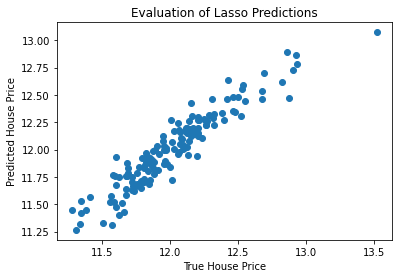

In [15]:
# plot predictions vs real sale price
plt.scatter(y_test, lin_model.predict(X_test))
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')
plt.title('Evaluation of Lasso Predictions')

In [16]:
# evaluate the distribution of the errors, which should be fairly normally distributed
y_test.reset_index(drop=True, inplace=True)
preds = pd.Series(lin_model.predict(X_test))
preds

0      12.148226
1      11.919326
2      11.677107
3      12.304289
4      11.447473
         ...    
141    11.775100
142    12.316546
143    11.955957
144    11.757571
145    12.072691
Length: 146, dtype: float64

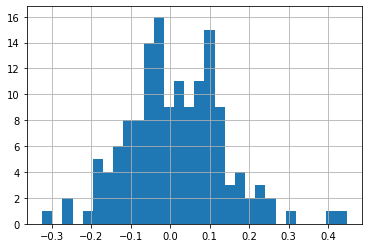

In [17]:
# plot 
errors = y_test['SalePrice'] - preds
errors.hist(bins=30)
plt.show()

### 1.2 Feature Importance

Text(0.5, 1.0, 'Feature Importance')

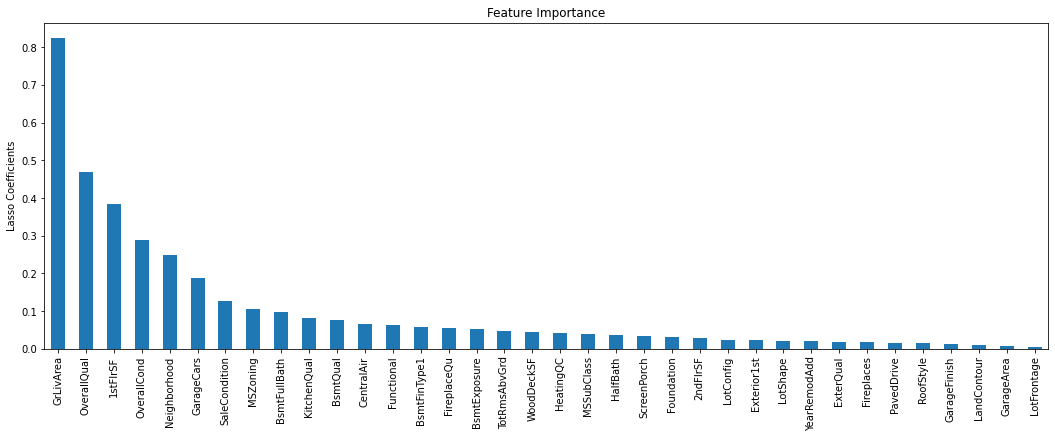

In [18]:
# look at the feature importance
importance = pd.Series(np.abs(lin_model.coef_.ravel()))
importance.index = features
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))
plt.ylabel('Lasso Coefficients')
plt.title('Feature Importance')

In [19]:
# save the model
joblib.dump(lin_model, 'linear_regression.joblib') 

['linear_regression.joblib']

## 1.3 Hyperparameter Tuning (GridSearch CV)

In [20]:
reg_l1 = Lasso(alpha=0.001, random_state=0)

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],
    'tol': [1e-3, 1e-4,1e-5],
    'max_iter': list(range(500,1000,100)),

}

reg_l1 = GridSearchCV(reg_l1, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

# fit the data
reg_l1.fit(X_train, y_train)
reg_l1.best_params_

Fitting 3 folds for each of 75 candidates, totalling 225 fits


{'alpha': 0.001, 'max_iter': 500, 'tol': 0.001}

In [21]:
# apply the best set of parameters
reg_l1 = Lasso(alpha=reg_l1.best_params_['alpha'], tol=reg_l1.best_params_['tol'],
                           max_iter =reg_l1.best_params_['max_iter'])
    
# fit and predict
reg_l1.fit(X_train, y_train)
y_pred_reg = reg_l1.predict(X_test)

# accuracy
print('test r2: {}'.format(
    r2_score(np.exp(y_test), np.exp(y_pred_reg))))

test r2: 0.8464817517980346


## 2. Decision Tree 

### 2.1 Modelling

In [22]:
reg_dt = DecisionTreeRegressor(max_depth=5)

# cross validation
scores = cross_val_score(reg_dt, X_train, y_train, scoring='r2', cv=5)
print(scores)

[0.7778263  0.68527316 0.77149417 0.79667351 0.72585888]


In [23]:
# train the model
reg_dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [24]:
# make predictions for train set
pred = reg_dt.predict(X_train)

# mse, rmse and r2
print('train mse: {}'.format(int(
    mean_squared_error(np.exp(y_train), np.exp(pred)))))
print('train rmse: {}'.format(int(
    mean_squared_error(np.exp(y_train), np.exp(pred), squared=False))))
print('train r2: {}'.format(
    r2_score(np.exp(y_train), np.exp(pred))))
print()

# make predictions for test set
pred = reg_dt.predict(X_test)

# mse, rmse and r2
print('test mse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred)))))
print('test rmse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred), squared=False))))
print('test r2: {}'.format(
    r2_score(np.exp(y_test), np.exp(pred))))
print()

print('Average house price: ', int(np.exp(y_train).median()))

train mse: 945268465
train rmse: 30745
train r2: 0.8486076364692694

test mse: 1252616806
test rmse: 35392
test r2: 0.8177247100248575

Average house price:  163000


### 2.2 Hyperparameter Tuning (GridSearch CV)

In [25]:
reg_dt = DecisionTreeRegressor()

param_grid =  {
    #'criterion': ['squared_error', 'friedman_mse', 'absolute_error'], 
    'max_depth': range(4,10), 'min_samples_leaf': range(2,5), 'max_features':['auto', 'sqrt', 'log2']}

reg_dt = GridSearchCV(reg_dt, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

# fit the data
reg_dt.fit(X_train, y_train)
reg_dt.best_params_


Fitting 3 folds for each of 54 candidates, totalling 162 fits


{'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 4}

In [26]:
# apply the best set of parameters
reg_dt = DecisionTreeRegressor( max_depth = reg_dt.best_params_['max_depth'],
                                min_samples_leaf = reg_dt.best_params_['min_samples_leaf'],
                                max_features = reg_dt.best_params_['max_features'])
    
# fit and predict
reg_dt.fit(X_train, y_train)
y_pred_dt = reg_dt.predict(X_test)

# r2
print('test r2: {}'.format(
    r2_score(np.exp(y_test), np.exp(y_pred_dt))))

test r2: 0.5411880159683631


## 3. Random Forest 

### 3.1 Modelling

In [27]:
reg_rf = RandomForestRegressor(max_depth=5)

# cross validation
scores = cross_val_score(reg_rf, X_train, y_train, scoring='r2', cv=5)
print(scores)

/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ben

[0.85221998 0.80296337 0.84013397 0.84965679 0.8407235 ]


In [28]:
# train the model
reg_rf.fit(X_train, y_train)

/var/folders/kg/_wytrhns3kgck5_ldyyl74xw0000gn/T/ipykernel_1776/11874335.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg_rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=5)

In [29]:
# make predictions for train set
pred = reg_rf.predict(X_train)

# mse, rmse and r2
print('train mse: {}'.format(int(
    mean_squared_error(np.exp(y_train), np.exp(pred)))))
print('train rmse: {}'.format(int(
    mean_squared_error(np.exp(y_train), np.exp(pred), squared=False))))
print('train r2: {}'.format(
    r2_score(np.exp(y_train), np.exp(pred))))
print()

# make predictions for test set
pred = reg_rf.predict(X_test)

# mse, rmse and r2
print('test mse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred)))))
print('test rmse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred), squared=False))))
print('test r2: {}'.format(
    r2_score(np.exp(y_test), np.exp(pred))))
print()

print('Average house price: ', int(np.exp(y_train).median()))

train mse: 642105994
train rmse: 25339
train r2: 0.8971615496912508

test mse: 1321608748
test rmse: 36353
test r2: 0.8076853059312441

Average house price:  163000


### 3.2 Hyperparameter Tuning (GridSearch CV)

In [30]:
reg_rf = RandomForestRegressor()

param_grid =  {
    #'criterion': ['squared_error', 'friedman_mse', 'absolute_error'], 
    'max_depth': range(4,10), 'min_samples_leaf': range(2,5), 'max_features':['auto', 'sqrt', 'log2']}

reg_rf = GridSearchCV(reg_rf, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

# fit the data
reg_rf.fit(X_train, y_train)
reg_rf.best_params_


Fitting 3 folds for each of 54 candidates, totalling 162 fits


/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ben

/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ben

/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ben

/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ben

/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ben

/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ben

{'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 2}

In [31]:
# apply the best set of parameters
reg_rf = RandomForestRegressor( max_depth = reg_rf.best_params_['max_depth'],
                                min_samples_leaf = reg_rf.best_params_['min_samples_leaf'],
                                max_features = reg_rf.best_params_['max_features'])
    
# fit and predict
reg_rf.fit(X_train, y_train)
y_pred_rf = reg_rf.predict(X_test)

# r2
print('test r2: {}'.format(
    r2_score(np.exp(y_test), np.exp(y_pred_rf))))

/var/folders/kg/_wytrhns3kgck5_ldyyl74xw0000gn/T/ipykernel_1776/2276412324.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg_rf.fit(X_train, y_train)


test r2: 0.8224674332015257


## 4. k-NN

### 4.1 Modelling

In [32]:
reg_knn = KNeighborsRegressor(n_neighbors=5)

# cross validation
scores = cross_val_score(reg_knn, X_train, y_train, scoring='r2', cv=5)
print(scores)

[0.7678369  0.79394632 0.78769925 0.76012718 0.79268023]


In [33]:
# train the model
reg_knn.fit(X_train, y_train)

KNeighborsRegressor()

In [34]:
# make predictions for train set
pred = reg_knn.predict(X_train)

# mse, rmse and r2
print('train mse: {}'.format(int(
    mean_squared_error(np.exp(y_train), np.exp(pred)))))
print('train rmse: {}'.format(int(
    mean_squared_error(np.exp(y_train), np.exp(pred), squared=False))))
print('train r2: {}'.format(
    r2_score(np.exp(y_train), np.exp(pred))))
print()

# make predictions for test set
pred = reg_knn.predict(X_test)

# mse, rmse and r2
print('test mse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred)))))
print('test rmse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred), squared=False))))
print('test r2: {}'.format(
    r2_score(np.exp(y_test), np.exp(pred))))
print()

print('Average house price: ', int(np.exp(y_train).median()))

train mse: 1029180867
train rmse: 32080
train r2: 0.835168388844941

test mse: 1786327135
test rmse: 42264
test r2: 0.74006152961281

Average house price:  163000


### 4.2 Hyperparameter Tuning (GridSearch CV)

In [35]:
reg_knn = KNeighborsRegressor(n_neighbors=5)

param_grid =  {
    'n_neighbors': range(2,8), 'weights':['uniform', 'distance'], 'algorithm':['auto', 'ball_tree', 'kd_tree'] }

reg_knn = GridSearchCV(reg_knn, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

# fit the data
reg_knn.fit(X_train, y_train)
reg_knn.best_params_

Fitting 3 folds for each of 36 candidates, totalling 108 fits


{'algorithm': 'auto', 'n_neighbors': 4, 'weights': 'distance'}

In [36]:
# apply the best set of parameters
reg_knn = KNeighborsRegressor( n_neighbors = reg_knn.best_params_['n_neighbors'],
                               weights = reg_knn.best_params_['weights'],
                               algorithm = reg_knn.best_params_['algorithm'])
    
# fit and predict
reg_knn.fit(X_train, y_train)
y_pred_knn = reg_knn.predict(X_test)

# r2
print('test r2: {}'.format(
    r2_score(np.exp(y_test), np.exp(y_pred_knn))))

test r2: 0.7554768426477998


## 5. SVM

In [37]:
reg_svr = SVR(C=1.0, epsilon=0.2)
# reg_svr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))

# cross validation
scores = cross_val_score(reg_svr, X_train, y_train, scoring='r2', cv=5)
print(scores)

[0.87436872 0.87165851 0.86945747 0.8583192  0.8964982 ]


/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sk

In [38]:
# train the model
reg_svr.fit(X_train, y_train)

/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(epsilon=0.2)

In [39]:
# make predictions for train set
pred = reg_svr.predict(X_train)

# mse, rmse and r2
print('train mse: {}'.format(int(
    mean_squared_error(np.exp(y_train), np.exp(pred)))))
print('train rmse: {}'.format(int(
    mean_squared_error(np.exp(y_train), np.exp(pred), squared=False))))
print('train r2: {}'.format(
    r2_score(np.exp(y_train), np.exp(pred))))
print()

# make predictions for test set
pred = reg_svr.predict(X_test)

# mse, rmse and r2
print('test mse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred)))))
print('test rmse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred), squared=False))))
print('test r2: {}'.format(
    r2_score(np.exp(y_test), np.exp(pred))))
print()

print('Average house price: ', int(np.exp(y_train).median()))

train mse: 529094772
train rmse: 23002
train r2: 0.9152612077244202

test mse: 1455947873
test rmse: 38156
test r2: 0.7881368672709905

Average house price:  163000


### 5.2 Hyperparameter Tuning (GridSearch CV)

In [40]:
reg_svr =  SVR()


param_grid =  {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C':[1,2,4], 'epsilon':[0.01, 0.1, 1] }

reg_svr = GridSearchCV(reg_svr, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

# fit the data
reg_svr.fit(X_train, y_train)
reg_svr.best_params_

Fitting 3 folds for each of 36 candidates, totalling 108 fits


/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sk

/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sk

/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sk

/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sk

{'C': 1, 'epsilon': 0.1, 'kernel': 'linear'}

In [41]:
# apply the best set of parameters
reg_svr = SVR( kernel = reg_svr.best_params_['kernel'],
                               C = reg_svr.best_params_['C'],
                               epsilon = reg_svr.best_params_['epsilon'])
    
# fit and predict
reg_svr.fit(X_train, y_train)
y_pred_svr = reg_svr.predict(X_test)

# r2
print('test r2: {}'.format(
    r2_score(np.exp(y_test), np.exp(y_pred_svr))))

test r2: 0.8852994093321587


/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [42]:
X_test
X_test.columns.values.tolist()

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'OverallQual',
 'OverallCond',
 'YearRemodAdd',
 'RoofStyle',
 'Exterior1st',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'HalfBath',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'PavedDrive',
 'WoodDeckSF',
 'ScreenPorch',
 'SaleCondition']

Text(0.5, 0, 'Permutation Importance')

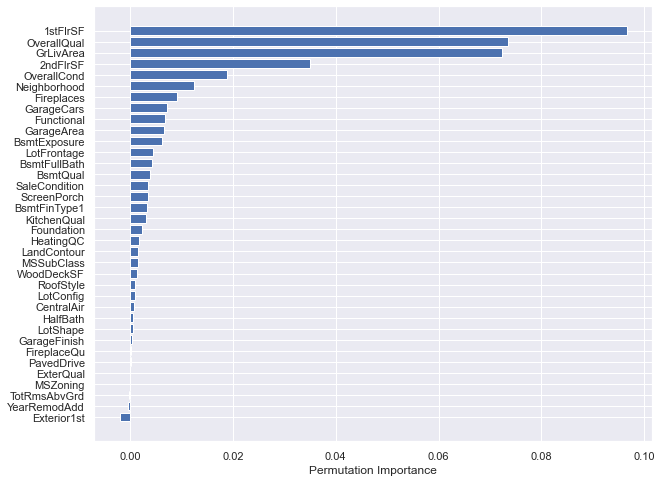

In [43]:
sns.set(rc={'figure.figsize':(10,8)})
perm_importance = permutation_importance(reg_svr, X_test, y_test)

feature_names = X_test.columns.values.tolist()
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])

#importance.plot.bar(figsize=(18,6))

plt.xlabel("Permutation Importance")

## 6. Gradient Boosting

### 6.1 Modelling

In [44]:
reg_xgb = ensemble.GradientBoostingRegressor()

# cross validation
scores = cross_val_score(reg_xgb, X_train, y_train, scoring='r2', cv=5)
print(scores)

/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sklearn/ensemb

[0.90417046 0.89273969 0.89371554 0.89606112 0.90920081]


/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [45]:
reg_xgb.fit(X_train, y_train)

/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor()

In [46]:
# make predictions for train set
pred = reg_xgb.predict(X_train)

# mse, rmse and r2
print('train mse: {}'.format(int(
    mean_squared_error(np.exp(y_train), np.exp(pred)))))
print('train rmse: {}'.format(int(
    mean_squared_error(np.exp(y_train), np.exp(pred), squared=False))))
print('train r2: {}'.format(
    r2_score(np.exp(y_train), np.exp(pred))))
print()

# make predictions for test set
pred = reg_xgb.predict(X_test)

# mse, rmse and r2
print('test mse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred)))))
print('test rmse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred), squared=False))))
print('test r2: {}'.format(
    r2_score(np.exp(y_test), np.exp(pred))))
print()

print('Average house price: ', int(np.exp(y_train).median()))

train mse: 248635741
train rmse: 15768
train r2: 0.9601789819654649

test mse: 1098415585
test rmse: 33142
test r2: 0.8401633937564844

Average house price:  163000


### 6.2 Hyperparameter Tuning (GridSearch CV)

In [47]:
reg_xgb = ensemble.GradientBoostingRegressor()

param_grid =  {
    'max_depth': range(4,10), 'min_samples_leaf': range(2,5), 'max_features':['auto', 'sqrt', 'log2']}

reg_xgb = GridSearchCV(reg_xgb, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

# fit the data
reg_xgb.fit(X_train, y_train)
reg_xgb.best_params_

Fitting 3 folds for each of 54 candidates, totalling 162 fits


/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sklearn/ensemb

/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sklearn/ensemb

/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sklearn/ensemb

/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sklearn/ensemb

/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sklearn/ensemb

/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2}

In [48]:
# apply the best set of parameters
reg_xgb = RandomForestRegressor( max_depth = reg_xgb.best_params_['max_depth'],
                                min_samples_leaf = reg_xgb.best_params_['min_samples_leaf'],
                                max_features = reg_xgb.best_params_['max_features'])
    
# fit and predict
reg_xgb.fit(X_train, y_train)
y_pred_xgb = reg_xgb.predict(X_test)

# r2
print('test r2: {}'.format(
    r2_score(np.exp(y_test), np.exp(y_pred_xgb))))

test r2: 0.7974653381939443


/var/folders/kg/_wytrhns3kgck5_ldyyl74xw0000gn/T/ipykernel_1776/1316213316.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg_xgb.fit(X_train, y_train)


## 7. Feature Importance

### 7.1 Lasso

Text(0.5, 1.0, 'Feature Importance')

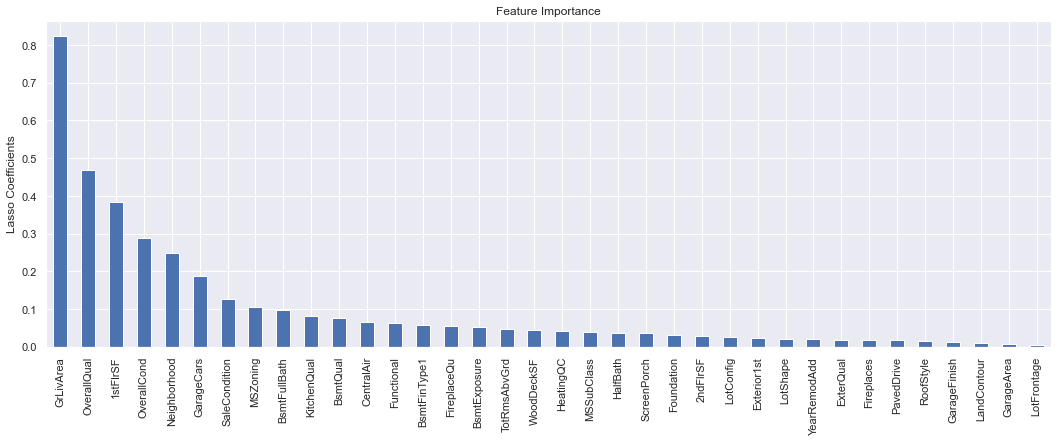

In [49]:
# look at the feature importance
importance = pd.Series(np.abs(lin_model.coef_.ravel()))
importance.index = features
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))
plt.ylabel('Lasso Coefficients')
plt.title('Feature Importance')

### 7.2 SVR

In [50]:
reg_svr =  SVR(C= 1, epsilon= 0.1, kernel='linear')
reg_svr.fit(X_train, y_train)

/Users/ben/Desktop/py_proj/house_price_prediction/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1, kernel='linear')

Text(0.5, 0, 'Permutation Importance')

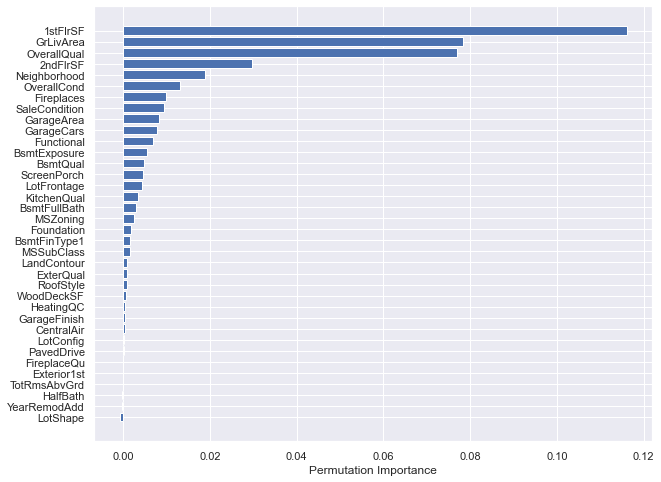

In [51]:
sns.set(rc={'figure.figsize':(10,8)})
perm_importance = permutation_importance(reg_svr, X_test, y_test)

feature_names = X_test.columns.values.tolist()
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])

#importance.plot.bar(figsize=(18,6))

plt.xlabel("Permutation Importance")